## Haberman data set for cancer survival

Haverman data set is the result of the research conducted between 1958 and 1970 to examine the patient will survived for less than 5 years or grater than equal to five years after operation. The study was held at the University of Chicago's Billings Hospital.

### Content
It contains the three features and two classes

nodes - Positive Lymph Nodes

year - Year of operation

age - Age of patient

class 1 - Patient survived more than 5 years

class 2 - patient survived less than 5 years

#### Lymph Node
Lymph nodes are small, bean-shaped organs that act as filters along the lymph fluid channels. As lymph fluid leaves the breast and eventually goes back into the bloodstream, the lymph nodes try to catch and trap cancer cells before they reach other parts of the body. Having cancer cells in the lymph nodes under your arm suggests an increased risk of the cancer spreading.In our data it is axillary nodes detected(0–52)

#### Age
It represent the age of patient at which they undergone surgery (age from 30 to 83)

#### Year
in which patient was undergone surgery

#### Survival Status
It represent whether patient survive more than 5 years or less after undergone through surgery.Here if patients survived 5 years or more is represented as 1 and patients who survived less than 5 years is represented as 2.

In [2]:
# IMPORTING RECQUIRED LIBRARIES
import os
import time
import random
import pickle
import warnings
from math import sqrt
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import xgboost as xgb
import seaborn as sns
from sklearn.svm import SVR
from scipy.special import expit
import matplotlib.pyplot as plt
from numpy.random import normal
from sklearn.model_selection import KFold
from sklearn import ensemble,preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

### IMPORTING THE DATASET

In [16]:
df=pd.read_csv("haberman.csv")

In [17]:
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


#### Checking the columns

In [18]:
df.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [19]:
df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


#### CREATING A COPY OF DATASET

In [20]:
df1=df.copy()

In [21]:
df1.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


Checking for null values

In [72]:
df1.isnull().sum()

age       0
year      0
nodes     0
status    0
dtype: int64

There is no null values present in given dataset

### Replacing values as given below
#### 1 : survived
#### 2 : not survived

In [22]:
df1["status"]=df1["status"].map({1:"survived",2:"not survived"})
df1["status"]=df1["status"].astype('category') #making status column as category

In [23]:
df1.head() #looking for changes

,age,year,nodes,status
0,30,64,1,survived
1,30,62,3,survived
2,30,65,0,survived
3,31,59,2,survived
4,31,65,4,survived


In [48]:
df1["status"].value_counts()

survived        225
not survived     81
Name: status, dtype: int64

In [24]:
print("Shape of the data ---------------------->", df1.shape )
print("Columns of data ------------------------> ", df1.columns)
print("Unique values in the status column -----> ", df1["status"].unique())
print("How many values are present in each different category --->",df1["status"].value_counts())

Shape of the data ----------------------> (306, 4)
Columns of data ------------------------>  Index(['age', 'year', 'nodes', 'status'], dtype='object')
Unique values in the status column ----->  ['survived', 'not survived']
Categories (2, object): ['not survived', 'survived']
How many values are present in each different category ---> survived        225
not survived     81
Name: status, dtype: int64


#### OBJECTIVE

The objective is to predict whether the patient will survive for more than five years or not given the patient age , year of operation,Lymph nodes.The given problem is a classification problem , we have to classify the data in any one of the two class labels.

### UNIVARIATIVE ANALYSIS

### Histogram

In [25]:
survived_patients=df1.loc[df1["status"]=="survived"]
not_survived=df1.loc[df1["status"]=="not survived"]

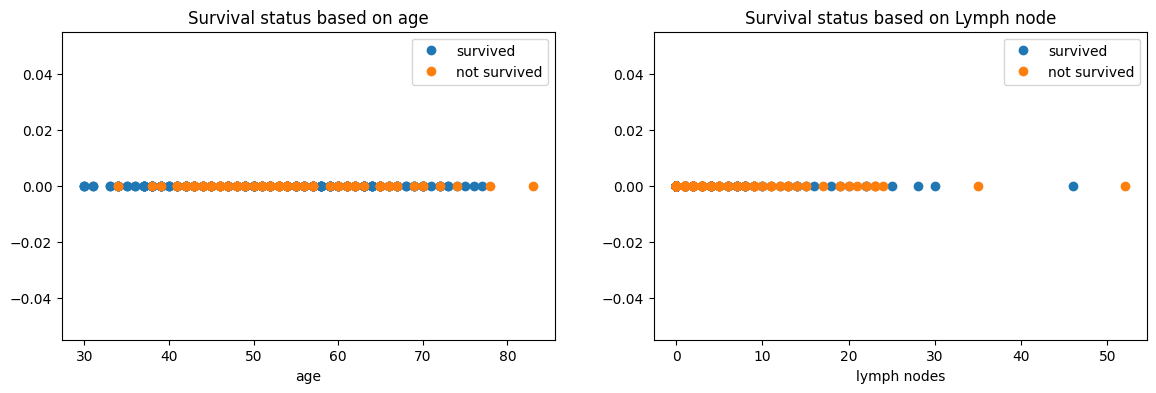

In [26]:
plt.figure(1,figsize=(14,4))
plt.subplot(121)
plt.plot(survived_patients["age"],np.zeros_like(survived_patients["age"]),'o',label="survived")
plt.plot(not_survived["age"],np.zeros_like(not_survived["age"]),'o',label="not survived")
plt.legend()
plt.xlabel("age")
plt.title("Survival status based on age")

# In the above graph it  shows that people survived or not based upon their age

plt.subplot(122)
plt.plot(survived_patients["nodes"],np.zeros_like(survived_patients["nodes"]),'o',label="survived")
plt.plot(not_survived["nodes"],np.zeros_like(not_survived["nodes"]),'o',label="not survived")
plt.legend()
plt.xlabel("lymph nodes")
plt.title("Survival status based on Lymph node")
plt.show()

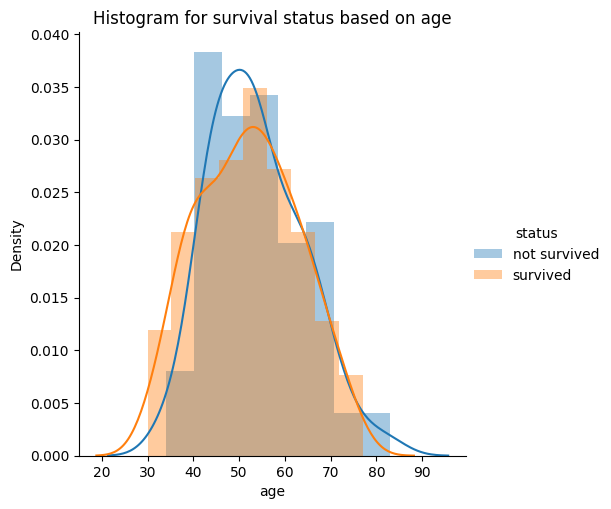

In [27]:
sns.FacetGrid(df1, hue="status", height=5).map(sns.distplot, "age").add_legend()
plt.title("Histogram for survival status based on age")
plt.show()


**OBSERVATIONS FROM ABOVE GRAPH**
*   Patient ages less than 40 are most likely survive
*   patient age between 40-60 are live less than five years




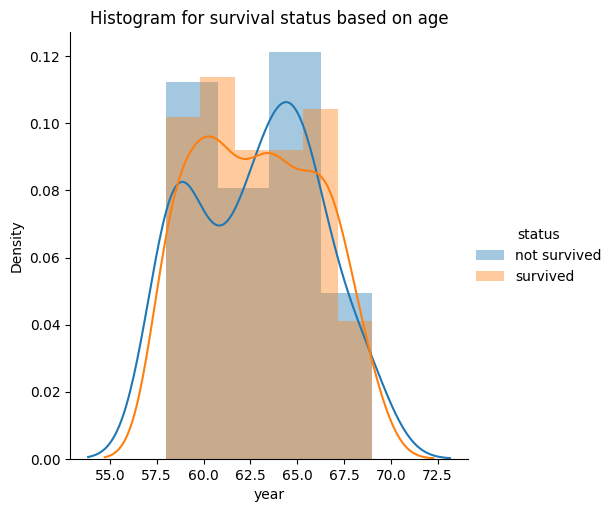

In [28]:
sns.FacetGrid(df1, hue="status", height=5).map(sns.distplot, "year").add_legend()
plt.title("Histogram for survival status based on age")
plt.show()

**OBSERVATION FROM ABOVE GRAPH**
*  People who got operated between 1958 to 1962 or1966 to 1968 more likely to survive more than five years.
*   People who got operated between 1962-1966 more likely to survive less than five years.



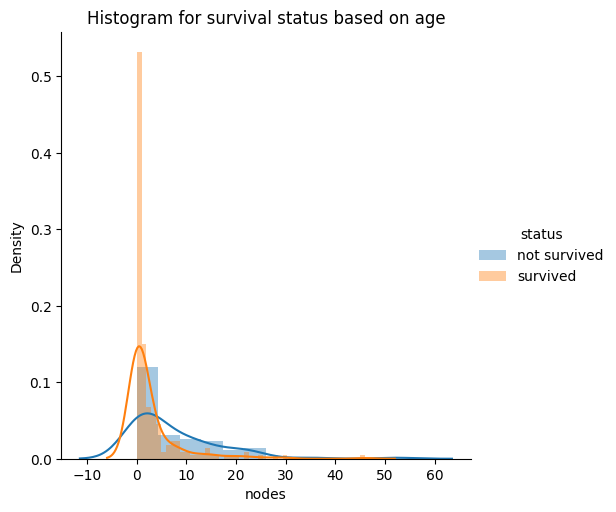

In [29]:
sns.FacetGrid(df1, hue="status", height=5).map(sns.distplot, "nodes").add_legend()
plt.title("Histogram for survival status based on age")
plt.show()

**OBSERVATION FROM ABOVE GRAPH**
*   People who are having less than 5 lymph nodes are having more chances are living more than 5 years.
*  People who are having more than 5 lymph nodes are having less chances are living more than 5 years.



BOX PLOT

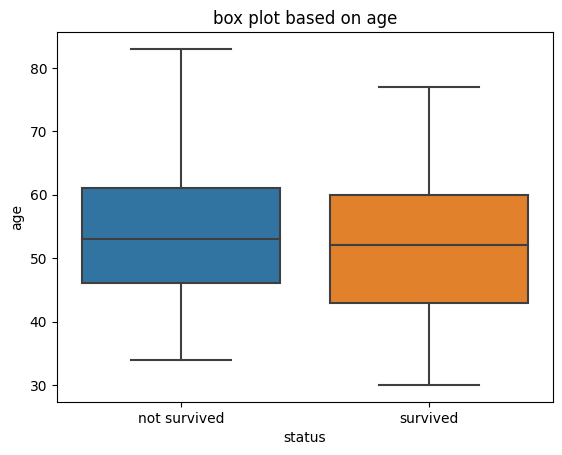

In [54]:
sns.boxplot(x="status",y="age",data=df1)
plt.title("box plot based on age")
plt.show()

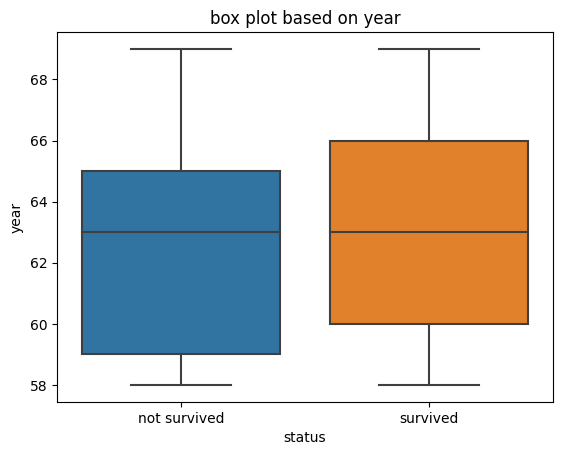

In [55]:
sns.boxplot(x="status",y="year",data=df1)
plt.title("box plot based on year")
plt.show()

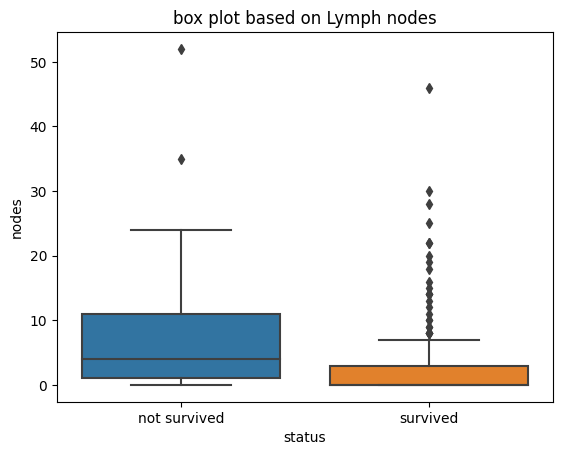

In [56]:
sns.boxplot(x="status",y="nodes",data=df1)
plt.title("box plot based on Lymph nodes")
plt.show()

**OBSERVATION FROM ABOVE GRAPH**
*   More than 75% of data have lymph nodes less than 10



<Axes: xlabel='year', ylabel='age'>

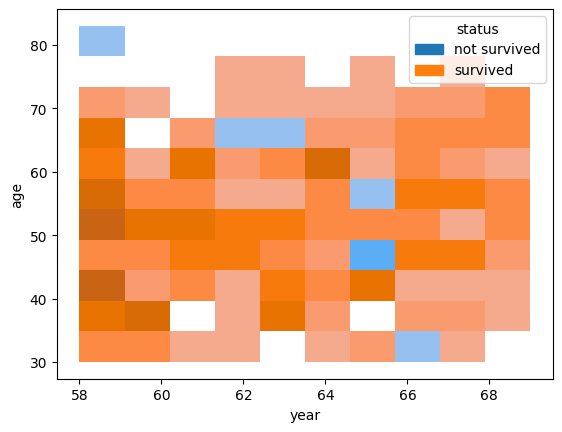

In [58]:
sns.histplot(data=df1, x="year",y="age", hue="status")

**OBSERVATIONS FROM ABOVE GRAPH**
*   People who are operated in the year 1958-1959 and having age between 35-68 are having more chances of living more than 5 years.
*   People who are operated in the year 1961-1963 and having age between 65-70 are not crossed more than 5 years..



**SCATTER PLOT**

Text(0.5, 1.0, 'Scatter plot for age and lymph node')

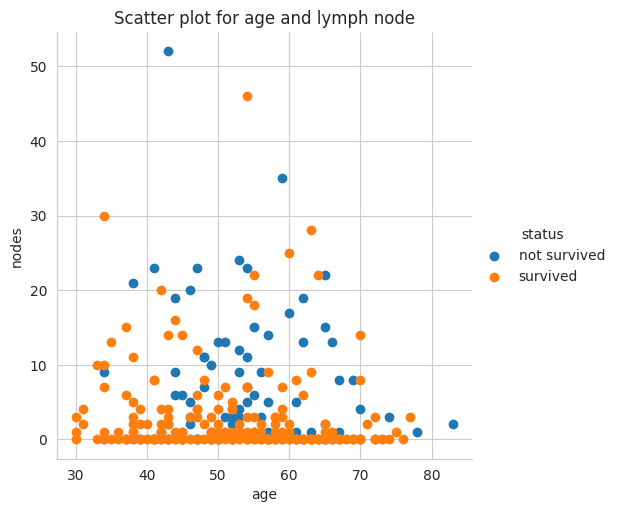

In [62]:
sns.set_style("whitegrid")
sns.FacetGrid(df1,hue="status",height=5).map(plt.scatter,"age","nodes").add_legend()
plt.title("Scatter plot for age and lymph node")

**Scatter plot for age and lymph node observation**
*   People who are having lymph nodes 0-1 and ages between 30 to 55  have greater chances of living more than 5 years
*    People who are having lymph nodes between 10 to 20  and ages between 50 to 65 are not living more than 5 years



Text(0.5, 1.0, 'Scatter plot for year and lymph node')

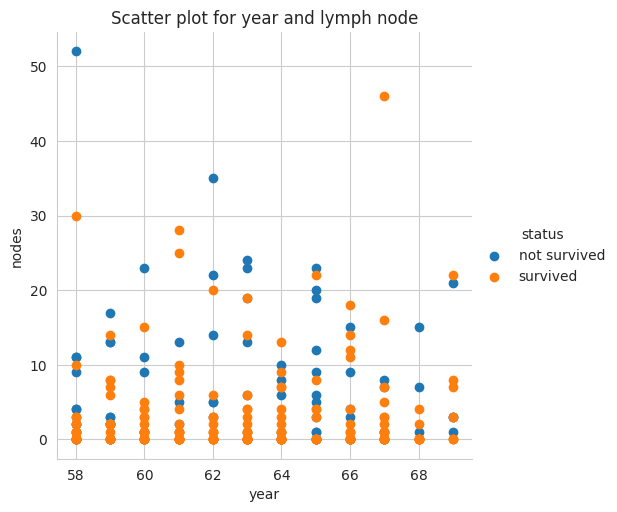

In [68]:
sns.set_style("whitegrid")
sns.FacetGrid(df1,hue="status",height=5).map(plt.scatter,"year","nodes").add_legend()
plt.title("Scatter plot for year and lymph node")

**Scatter plot for year and lymph node observation**
*   people are having lymph nodes 0-5 and operated between 1958 to 1964 can live more than 5 years



Text(0.5, 1.0, 'Scatter plot for year and age')

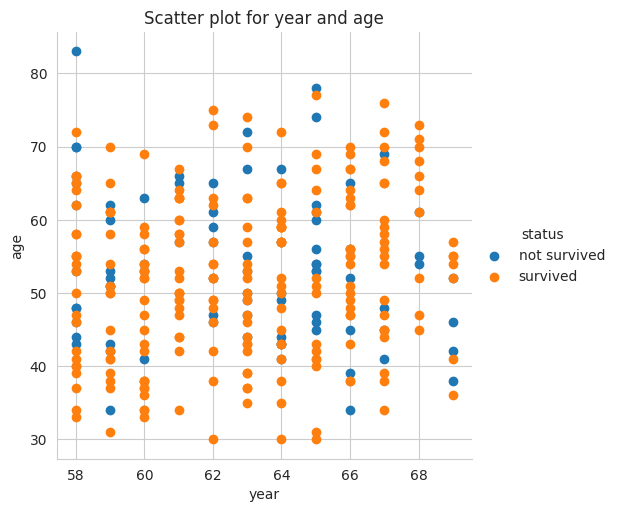

In [69]:
sns.set_style("whitegrid")
sns.FacetGrid(df1,hue="status",height=5).map(plt.scatter,"year","age").add_legend()
plt.title("Scatter plot for year and age")

PAIR PLOT

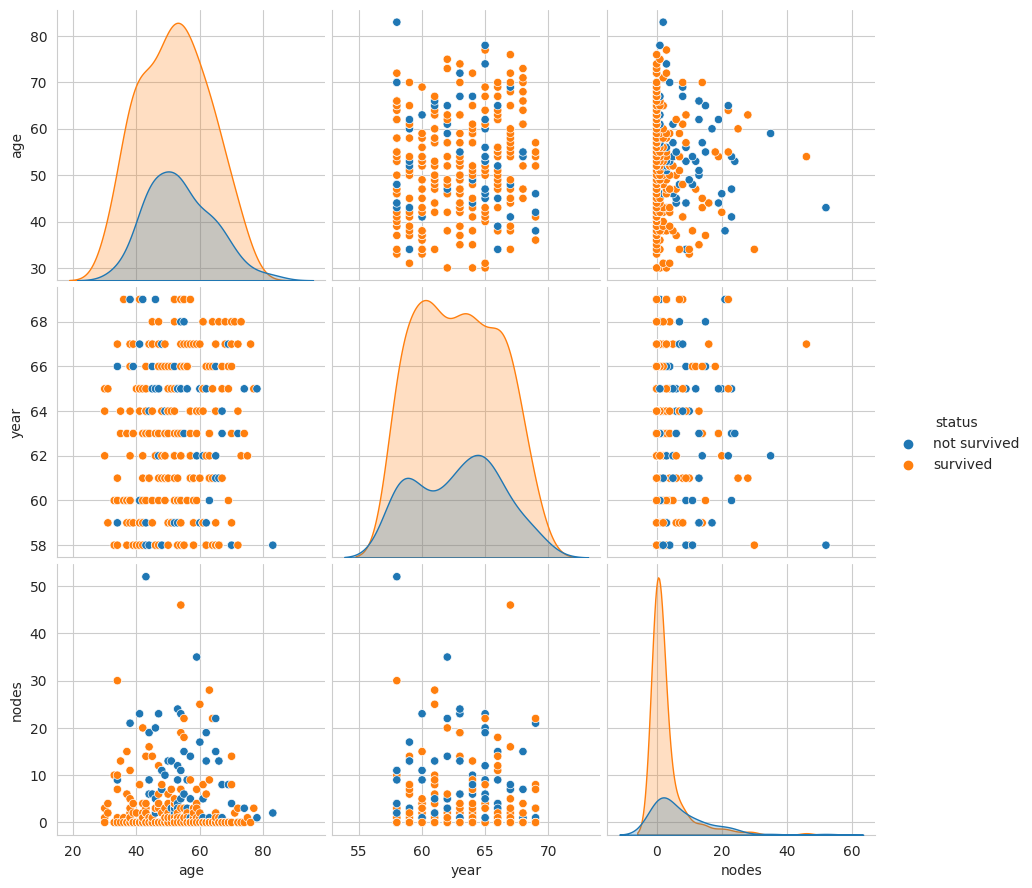

In [71]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(df1,hue="status",vars=["age","year","nodes"],size=3)
plt.show()

**OBSERVATION FROM PAIR PLOT**


*   Patient who are having age less than 40 more probably live more than 5 years




# **Conclusion**



*   Patient having age less than 40 years are more probable to survive.
*   Patient with less number of lymph nodes are more probable to survive.
*   More than 75% of patient having lymph nodes less than 10.




